In [213]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from paths import dataset_paths

from PIL import Image, ImageOps, ImageDraw
import numpy as np

In [400]:
def resize_and_keep_ratio(path, height):
    """
    Randomly select an image out if given path, resizes it to specific height and keeping the same aspect ratio
    
    Arguments:
        path: List with Paths to the images
        height: int value with desired image height
        
    Returns:
        Resized image in an PIL Image format
    """
        
    #select random folder
    folder = random.choice(path)
    #select random images
    images = random.sample(os.listdir(folder), 1)

    plt.figure(figsize=(10, 3))

    #List for plotting the images in subplots
    image_list = []

    image = Image.open(folder + "/" + images[0]).convert("L")
    if image.size[0] > 500:
        #Get a copy of the image for plotting
        image_before = image
        image_list.append(image_before)

        #Resize the image to specific height and keeping the same aspect ratio
        height_precent = (height / float(image.size[1]))
        width = int((float(image.size[0]) * float(height_precent)))
        image = image.resize((width, height), Image.NEAREST)
        image_list.append(image)

        #Plot the normal and resized image
        for i in range(len(image_list)):
            ax = plt.subplot(len(image_list), 1, i+1)
            plt.title(f"Height:{image_list[i].size[1]}, Width:{image_list[i].size[0]}")
            plt.imshow(image_list[i], cmap='gray')
        return(image)
    else:
        return image == 0

In [401]:
def crop_image(image, crop_width):
    """
    Crops an random part out of an image and display the cropped area
    
    Arguments:
        image: image in an numpy array format
        width: int value width desired crop width
        
    Return:
        Cropped image in an numpy array format
    """
    #Convert PIL Image object into numpy array
    img_array = np.array(image)
    #select random point on x-axis and crop the image
    x_max = img_array.shape[1] - crop_width
    x = np.random.randint(0, x_max)
    crop = img_array[0:crop_width, x: x + crop_width]
    
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.imshow(image, cmap='gray')
    # Create a Rectangle patch
    rect = patches.Rectangle((x, 0), 224, 224, linewidth=1, edgecolor='r', facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    plt.title("Cropped Area")
    plt.show(rect)

    return crop

<class 'str'>


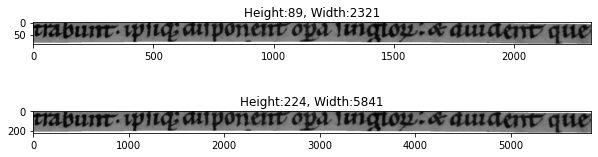

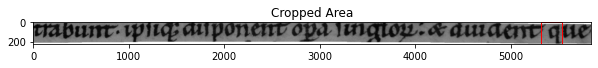

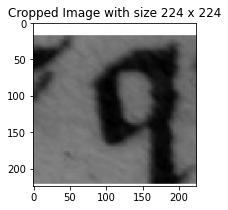

In [402]:
image_height, image_width = 224, 224

image = resize_and_keep_ratio(dataset_paths, image_height)
if image == 0:
    pass
else:
    crop = crop_image(image, image_width)
    plt.figure(figsize=(10,3))
    plt.title(f"Cropped Image with size {crop.shape[1]} x {crop.shape[0]}")
    plt.imshow(crop, cmap='gray')